# 10. Graphs

## Directed Graph

### Edge List

In [1]:
n = 8
edge_list = [[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]
edge_list

[[0, 1], [1, 2], [0, 3], [3, 4], [3, 6], [3, 7], [4, 2], [4, 5], [5, 2]]

### Display

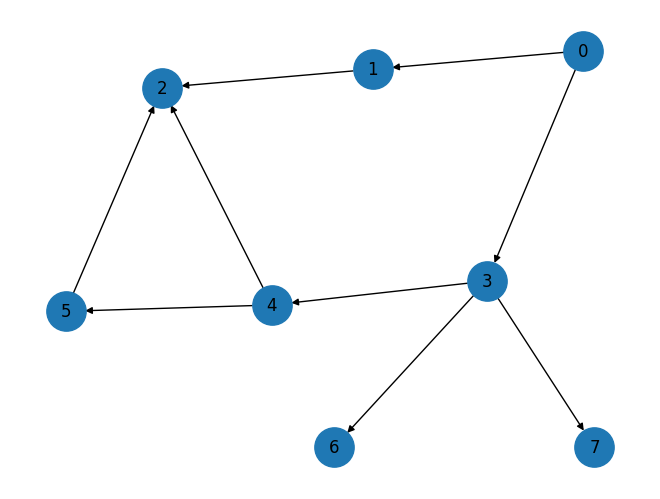

In [9]:
import networkx as nx
import matplotlib.pyplot as plt


graph = nx.DiGraph()
graph.add_edges_from(edge_list)

pos = nx.kamada_kawai_layout(graph)
pos[7] = (pos[7][0] + 1, pos[7][1])
nx.draw(graph, pos, with_labels=True, arrows=True, node_size=800)
plt.show()

### Adjacency Matrix

In [3]:
from typing import Literal


def get_adjacency_matrix(
    n: int, edge_list: list, type: Literal["directed", "undirected"] = "directed"
) -> list[list]:
    adj_matrix = []
    for _ in range(n):
        adj_matrix.append([0] * n)

    for u, v in edge_list:
        adj_matrix[u][v] = 1
        if type == "undirected":
            adj_matrix[v][u] = 1

    return adj_matrix


get_adjacency_matrix(n, edge_list)

[[0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0]]

### Adjacency List

In [4]:
from collections import defaultdict


def get_adjacency_list(
    edge_list: list, type: Literal["directed", "undirected"] = "directed"
) -> list[list]:
    adj_list = defaultdict(list)
    for u, v in edge_list:
        adj_list[u].append(v)
        if type == "undirected":
            adj_list[v].append(u)

    return adj_list


adj_list = get_adjacency_list(edge_list)
print(adj_list)
adj_list[3]

defaultdict(<class 'list'>, {0: [1, 3], 1: [2], 3: [4, 6, 7], 4: [2, 5], 5: [2]})


[4, 6, 7]

### Depth-First Search

#### Recursive DFS

In [5]:
def recursive_dfs(node):
    """
    Time Complexity: O(V + E) (V is the number of nodes and E is the number of edges)
    Space Complexity: O(V + E)
    """
    print(node)
    for neighbor_node in adj_list[node]:
        if neighbor_node not in seen:
            seen.add(neighbor_node)
            recursive_dfs(neighbor_node)


source = 0
seen = set()
seen.add(source)
recursive_dfs(source)

0
1
2
3
4
5
6
7


#### Iterative DFS

In [6]:
def iterative_dfs(stack: list):
    """
    Time Complexity: O(V + E) (V is the number of nodes and E is the number of edges)
    Space Complexity: O(V + E)
    """
    while stack:
        node = stack.pop()
        print(node)
        for neighbor_node in adj_list[node]:
            if neighbor_node not in seen:
                seen.add(neighbor_node)
                stack.append(neighbor_node)


source = 0
seen = set()
seen.add(source)
stack = [source]
iterative_dfs(stack)

0
3
7
6
4
5
2
1


### Breadth-First Search

In [7]:
from collections import deque


def iterative_bfs(queue: deque):
    """
    Time Complexity: O(V + E) (V is the number of nodes and E is the number of edges)
    Space Complexity: O(V + E)
    """
    while queue:
        node = queue.popleft()
        print(node)
        for neighbor_node in adj_list[node]:
            if neighbor_node not in seen:
                seen.add(neighbor_node)
                queue.append(neighbor_node)


source = 0
seen = set()
seen.add(source)
queue = deque()
queue.append(source)
iterative_bfs(queue)

0
1
3
2
4
6
7
5


### Class implementation

In [8]:
class Node:
    def __init__(self, value: str):
        self.value = value
        self.neighbors = []

    def __str__(self) -> str:
        return f"Node({self.value})"

    def display(self):
        connections = [node.value for node in self.neighbors]
        print(f"{self.value} is connected to: {connections}")


A = Node("A")
B = Node("B")
C = Node("C")
D = Node("D")

A.neighbors.append(B)
B.neighbors.append(A)

C.neighbors.append(D)
D.neighbors.append(C)

for node in [A, B, C, D]:
    node.display()

A is connected to: ['B']
B is connected to: ['A']
C is connected to: ['D']
D is connected to: ['C']
